In [2]:
#Dev

import pandas as pd
import numpy as np
# this part needed for mac
# import pymysql
# pymysql.install_as_MySQLdb()
############################
import seaborn as sns
from mysql.connector import MySQLConnection, Error
from XML2MySQL import connect
from MySQL2PandasDF import MySQL2PandasDF
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
% matplotlib inline

# Init Session Object

In [3]:
session = MySQL2PandasDF(host = 'localhost', db = 'stackexchange_travel', user = 'root', password = 'F0xyrules30')

Connection to MySQL database stackexchange_travel successful.


## db2df method parses the entirety of a database to pandas dfs

In [4]:
session.db2df()

C:\Users\jeffe\Anaconda3\lib\site-packages\sqlalchemy\dialects\mysql\base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


Underlying structure is a dictionary with the following format:

{Table Name: df}

In [5]:
# tables in our dictionary

session.source.keys()

dict_keys(['badges', 'comments', 'posthistory', 'postlinks', 'posts', 'tags', 'users', 'votes'])

## Head of every table in database

In [ ]:
session.source['badges'].head()

In [ ]:
session.source['comments'].head()

In [ ]:
session.source['posthistory'].head()

In [ ]:
session.source['postlinks'].head()

In [ ]:
session.source['posts'].head()

In [ ]:
session.source['tags'].head()

In [ ]:
session.source['users'].head()

In [ ]:
session.source['votes'].head()

# Data Exploration

# Find posts tagged to multiple items and plot post activity

In [16]:
def plot_post_activity_for_posts_with_multiple_tags(tags_search_term1, tags_search_term2):
    """
    This function returns a histogram of post activity for posts tagged with any two tags
    
    params:     tags_search_term1: str: first tag search term to find posts with
                tags_search_term2: str: second tag search term to find posts with
                
    return:     matplotlib.pyplot.hist of number of post reponses for given topic
    """
    if isinstance(tags_search_term1,str) and isinstance(tags_search_term2,str):
        # Extract html from body of posts
        session.source['posts']['Body_extract1'] = session.source['posts']["Body"].str.findall(r">(:?.+)<").str.join(' ')
        session.source['posts']['Body_links'] = session.source['posts']["Body_extract1"].str.findall(r">(:?.+)<").str.join('').str.findall(r'"(:?.+)"').str.join(' ')
        session.source['posts']['Tags_tags_removed'] = session.source['posts']['Tags'].str.findall(r"<(:?.+)>").str.join('').str.replace('>','').str.replace('<',' ')
        
        # Create search space to find search terms within
        # Groupby and stage data
        session.source['posts_'+tags_search_term1+'_tags'] = session.source['posts'][session.source['posts']['Tags_tags_removed'].str.contains(tags_search_term1,na=False)]
        session.source['posts_'+tags_search_term1+'_tags']['Search_Space'] = session.source['posts_'+tags_search_term1+'_tags']['Tags_tags_removed'].map(str) + ' ' + session.source['posts_'+tags_search_term1+'_tags']['Title']
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2] = session.source['posts_'+tags_search_term1+'_tags'][session.source['posts_'+tags_search_term1+'_tags']['Search_Space'].str.lower().str.contains(tags_search_term2,na=False)]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'] = session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2].sort_values('ViewCount', ascending=False)[['Id','Title', 'Body_extract1', 'Body_links']]
        session.source['comments_id_score_text'] = session.source['comments'][['PostId','score','Text']]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text'] = pd.merge(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'], session.source['comments_id_score_text'],left_on='Id', right_on='PostId')
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text_qs_sorted_by_number_of_comments'] = session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text'].groupby('Title').count().sort_values('Text', ascending=False)
        
        # Plot
        piccap = 'Frequency Distribution of Comments on Posts Tagged '+tags_search_term1+' and '+tags_search_term2
        session.plotdf(sns.distplot(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text_qs_sorted_by_number_of_comments']['Text']),piccap)
        plt.title('Histogram of Responses to Posts Tagged '+tags_search_term1+' and '+ tags_search_term2)
        plt.xlabel('Number of Responses')
        plt.ylabel('Frequency')
    else:
        input('Inputs must be strings. Press any key to exit program.')
        sys.exit()

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


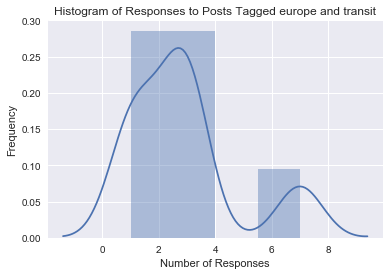

In [17]:
plot_post_activity_for_posts_with_multiple_tags('europe','transit')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


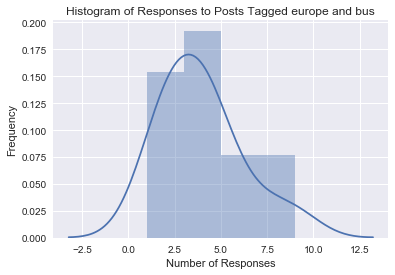

In [18]:
plot_post_activity_for_posts_with_multiple_tags('europe','bus')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


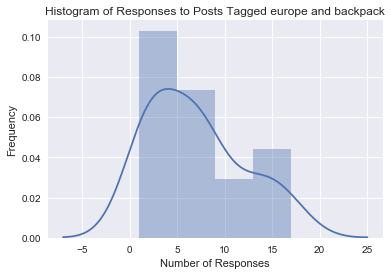

In [25]:
plot_post_activity_for_posts_with_multiple_tags('europe','backpack')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


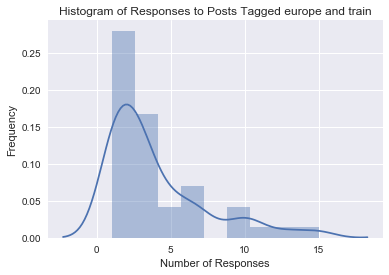

In [20]:
plot_post_activity_for_posts_with_multiple_tags('europe','train')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


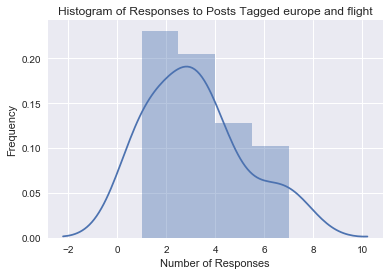

In [21]:
plot_post_activity_for_posts_with_multiple_tags('europe','flight')

## Comparison of post activities

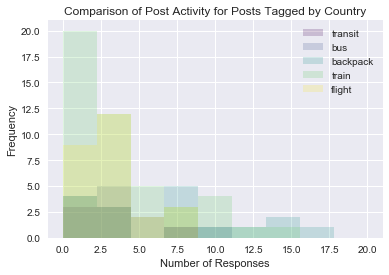

In [26]:
bins = np.linspace(0, 20, 10)
number = 5
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
for search_term2, color in zip(['transit','bus','backpack','train', 'flight'], colors):
    plt.hist(session.source['posts_europe_tagged_'+search_term2+'_Title_Body_Links_comments_id_score_text_qs_sorted_by_number_of_comments']['Text'], bins, alpha=0.2, label=search_term2, color=color)
plt.xlabel('Number of Responses')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Comparison of Post Activity for Posts Tagged by Country')

Posts tagged 'europe' and 'train' have the most post activity out of the 5 transportation modes explored

## Posts tagged 'europe' and 'train'

In [28]:
session.source['posts_'+'europe'+'_tagged_'+'train'+'_Title_Body_Links'].head()

,Id,Title,Body_extract1,Body_links
48684,68526,How does one sleep in a sleeper train in Europe?,Planning to travel from Germany through severa...,
2213,2351,How can I book the interrail passholder Eurost...,I don't see an option for it online. I'm in Sw...,
14,16,Is there a good website to plan a trip via tra...,OEBB</a>.,
3017,3191,Is this a realistic backpacking trip in Europe?,I'm trying to plan a backpacking trip in Europ...,
54144,77195,Luggage etiquette on European trains,I'm backpacking across Europe with a very larg...,


## Sort data by various features

In [29]:
def top_n_posts_with_multiple_tags(tags_search_term1, tags_search_term2, n=25, sort_method='views'):
    """
    This function returns a histogram of post activity for posts tagged with any two tags
    
    params:     tags_search_term1: str: first tag search term to find posts with
                tags_search_term2: str: second tag search term to find posts with
                n: int: n top number of posts to sort by
                sort_method: str: can either be ['views', 'scores']
                
    return:
    """
    if isinstance(tags_search_term1,str) and isinstance(tags_search_term2,str) and isinstance(n,int) and (sort_method =='views' or sort_method=='scores'):
        print('Top {}  Posts Tagged "{}" and "{}" Sorted by {}'.format(str(n), tags_search_term1, tags_search_term2, sort_method))
        print()
        # Extract html from body of posts
        session.source['posts']['Body_extract1'] = session.source['posts']["Body"].str.findall(r">(:?.+)<").str.join(' ')
        session.source['posts']['Body_links'] = session.source['posts']["Body_extract1"].str.findall(r">(:?.+)<").str.join('').str.findall(r'"(:?.+)"').str.join(' ')
        session.source['posts']['Tags_tags_removed'] = session.source['posts']['Tags'].str.findall(r"<(:?.+)>").str.join('').str.replace('>','').str.replace('<',' ')
        
        # Create search space to find search terms within
        # Groupby and stage data
        session.source['posts_'+tags_search_term1+'_tags'] = session.source['posts'][session.source['posts']['Tags_tags_removed'].str.contains(tags_search_term1,na=False)]
        session.source['posts_'+tags_search_term1+'_tags']['Search_Space'] = session.source['posts_'+tags_search_term1+'_tags']['Tags_tags_removed'].map(str) + ' ' + session.source['posts_'+tags_search_term1+'_tags']['Title']
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2] = session.source['posts_'+tags_search_term1+'_tags'][session.source['posts_'+tags_search_term1+'_tags']['Search_Space'].str.lower().str.contains(tags_search_term2,na=False)]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'] = session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2].sort_values('ViewCount', ascending=False)[['Id','Title', 'Body_extract1', 'Body_links']]
        session.source['comments_id_score_text'] = session.source['comments'][['PostId','score','Text','UserDisplayName']]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'] = pd.merge(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'], session.source['posts'][['Id','Score','ViewCount','ClosedDate']],left_on='Id', right_on='Id')
        if sort_method=='views':
            for i, t, be, bl in zip(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Id'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Title'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Body_extract1'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Body_links'], ):
                print('Title:\n'+ t)
                print()
                print()
                print('Post Body:\n'+be)
                print()
                print()
                print('Post Link:\n'+bl)
                print()
                print()
                print('Comments:\n')
                for i,comment in enumerate(session.source['comments_id_score_text'].loc[session.source['comments_id_score_text']['PostId']==i]['Text']):
                    print()
                    print()
                    print('Comment '+str(i+1)+':\n'+comment)
                    print()
                    print()
        else:
            for i, t, be, bl in zip(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Id'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Title'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Body_extract1'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Body_links'], ):
                print('Title:\n'+ t)
                print()
                print()
                print('Post Body:\n'+be)
                print()
                print()
                print('Post Link:\n'+bl)
                print()
                print()
                print('Comments:\n')
                for i,comment in enumerate(session.source['comments_id_score_text'].loc[session.source['comments_id_score_text']['PostId']==i]['Text']):
                    print()
                    print()
                    print('Comment '+str(i+1)+':\n'+comment)
                    print()
                    print()

## Top 25 Posts by Views Tagged 'europe' and 'train'

In [32]:
top_n_posts_with_multiple_tags('europe', 'train',sort_method='views')

Top 25  Posts Tagged "europe" and "train" Sorted by views

Title:
How does one sleep in a sleeper train in Europe?


Post Body:
Planning to travel from Germany through several other countries eastward on a sleeper train, I wonder what am I expected to encounter and how am I expected to dress? The tickets say 4 beds per compartment. As I guess the compartments don't have a place to change, is everyone expected to sleep in their street clothes? Hiking through the town all day then taking off the shoes in a small compartment might also cause unpleasant smells. Are there any places to change / wash ourselves, or are passengers expected to find someplace to shower before boarding the train?


Post Link:



Comments:



Comment 1:
Comments are not for extended discussion; this conversation has been [moved to chat](http://chat.stackexchange.com/rooms/39997/discussion-on-question-by-vsz-how-does-one-sleep-in-a-sleeper-train-in-europe).


Title:
How can I book the interrail passholder Eurostar 

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Top 25 Posts by Score Tagged 'europe' and 'train'

In [31]:
top_n_posts_with_multiple_tags('europe', 'train',sort_method='scores')

Top 25  Posts Tagged "europe" and "train" Sorted by scores

Title:
Is there a good website to plan a trip via trains in Europe?


Post Body:
OEBB</a>.


Post Link:



Comments:



Comment 1:
You might want to checkout http://www.rome2rio.com Not a map, but certainly a good tool to evaluate routes




Comment 2:
None of the five or more sites I've tried (including Rome2Rio) can find a train route from Spain to Romania.  Maps show routes.  Milan is on the way, but the first site that was able to handle Milan to Bucharest insisted that part of the trip is by bus.


Title:
How does one sleep in a sleeper train in Europe?


Post Body:
Planning to travel from Germany through several other countries eastward on a sleeper train, I wonder what am I expected to encounter and how am I expected to dress? The tickets say 4 beds per compartment. As I guess the compartments don't have a place to change, is everyone expected to sleep in their street clothes? Hiking through the town all day then taking

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Word map of Top 25 Posts

In [34]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from wordcloud import WordCloud
from collections import Counter
from itertools import chain

stop = stopwords.words('english')

def remove_stop_words(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return ' '.join([word for word in nopunc.split() if word.lower() not in stop])

def lemma(text):
    '''
    Takes in a string of text, then performs the following:
    '''
    lemma = WordNetLemmatizer()
    normalized = " ".join(lemma.lemmatize(word,'v') for word in text.split())
    x = normalized.split()
    y = [s for s in x if len(s) > 2]
    return y

def word_map_from_df(df, number_of_words=25):
    df['Search_space'] = df['Body_extract1'] + df['Title']
    df['Search_space_stopwords_removed'] = df['Search_space'].apply(lambda x: remove_stop_words(x))
    df['Search_space_stopwords_removed_lemma'] = df['Search_space_stopwords_removed'].apply(lambda x: lemma(x))
    wc = WordCloud(max_font_size=60, max_words=number_of_words).generate(' '.join(list(chain.from_iterable([x for x in df['Search_space_stopwords_removed_lemma']]))))
    plt.figure(figsize=(12,18))
    plt.imshow(wc)
    plt.axis("off")

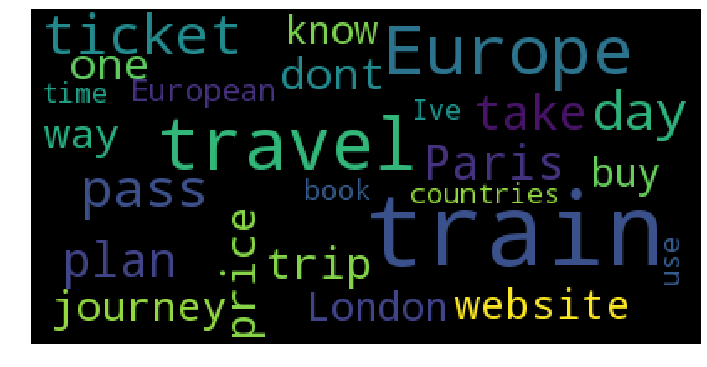

In [35]:
word_map_from_df(session.source['posts_'+'europe'+'_tagged_'+'train'+'_Title_Body_Links_Score_Views_ClosedDate'])

## Posts tagged 'europe' and 'backpack'

In [36]:
session.source['posts_'+'europe'+'_tagged_'+'backpack'+'_Title_Body_Links'].head()

,Id,Title,Body_extract1,Body_links
4703,4958,Opinions on budget amount for two months in Eu...,I am planning a trip around Europe for around ...,http://www.tripline.net/trip/Eurotrip_Bruce-60...
14748,18345,Which brand of backpack should I carry so as t...,I was wondering what brands of backpacks are p...,
4851,5113,Budget for traveling in Eastern Europe?,We are planning to backpack through Eastern Eu...,
3017,3191,Is this a realistic backpacking trip in Europe?,I'm trying to plan a backpacking trip in Europ...,
4766,5024,What sort of computer / electronic device woul...,As you may have seen in my other posts I am in...,"https://i.stack.imgur.com/YvWy8.jpg"" alt=""ente..."


## Sort data by various features

## Top 25 Posts by Views Tagged 'europe' and 'backpack'

In [37]:
top_n_posts_with_multiple_tags('europe', 'backpack',sort_method='views')

Top 25  Posts Tagged "europe" and "backpack" Sorted by views

Title:
Opinions on budget amount for two months in Europe?


Post Body:
I am planning a trip around Europe for around two months in the summer between June and August. I have a preliminary route planned: Starting <strong>Scotland</strong> --> June France Monte Carlo North Italy Slovenia Croatia Slovakia Austria Switzerland South Germany Czech Republic Poland North Germany Denmark Finland Sweden Norway -->Home <strong>Scotland</strong> - > Start of August approx. I have a budget of £4,000 UK sterling / <strong>4,799.88</strong>. What are your opinions on this amount of money? I won't be doing my trip hobo style and I won't be doing it like a prince. So lets say <strong>61 days</strong>, that's about 80/day. This of course is not factoring in the Euro crisis and exchange rate?  In France and Switzerland I will be staying with friends and family and will spend more of my time out of the whole journey in those places, e.g. two

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Top 25 Posts by Score Tagged 'europe' and 'backpack'

In [38]:
top_n_posts_with_multiple_tags('europe', 'backpack',sort_method='scores')

Top 25  Posts Tagged "europe" and "backpack" Sorted by scores

Title:
What sort of computer / electronic device would you take on a backpack trip around Europe to allow you to keep in touch?


Post Body:
As you may have seen in my other posts I am in the early stages of planning my Eurotrip this summer which if you are interested in seeing the planned route go here:  <a href="http://www.tripline.net/trip/Eurotrip_Bruce-6031502460441004AB55F3DFBEB7A2DD" rel="nofollow noreferrer">http://www.tripline.net/trip/Eurotrip_Bruce-6031502460441004AB55F3DFBEB7A2DD</a> I am trying to decide what sort of gadget I buy to use for communication with home whilst on my journey through Europe. So far I see myself with four options: <p><strong>The Tablet PC (iPad, Asus Transformer, Samsung Galaxy);</strong> <img src="https://i.stack.imgur.com/YvWy8.jpg" alt="enter image description here"> <strong>Advantages</strong>: portable, WiFi, 3G connectivity in some, long battery life <strong>Disadvantages</strong>

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Word map of Top 25 Posts

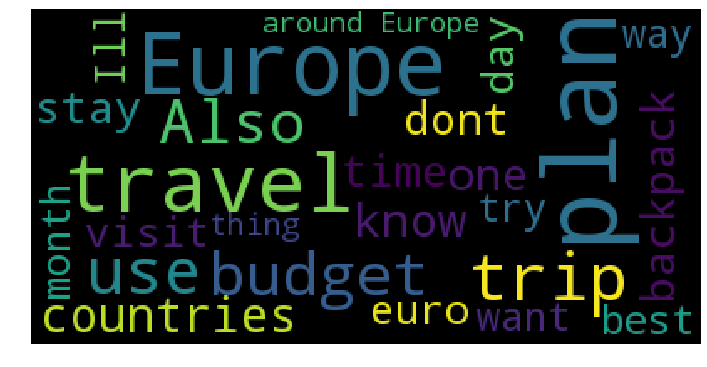

In [39]:
word_map_from_df(session.source['posts_'+'europe'+'_tagged_'+'backpack'+'_Title_Body_Links_Score_Views_ClosedDate'])